**Task 1**

**Web scraping and analysis**
This Jupyter notebook includes some code to get you started with web scraping. We will use a package called BeautifulSoup to collect the data from the web. Once you've collected your data and saved it into a local .csv file you should start with your analysis.

**Scraping data from Skytrax**
If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use Python and BeautifulSoup to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
import requests
from bs4 import BeautifulSoup

base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

for i in range(1, pages + 1):
    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")


Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | The WORST customer experience! ...
1,Not Verified | Had to cancel my flight month...
2,✅ Trip Verified | Flight cancelled with no rea...
3,✅ Trip Verified | This is a route I fly regula...
4,✅ Trip Verified | While BA may have made some...


In [ ]:
df

,reviews
0,Not Verified | The WORST customer experience! ...
1,Not Verified | Had to cancel my flight month...
2,✅ Trip Verified | Flight cancelled with no rea...
3,✅ Trip Verified | This is a route I fly regula...
4,✅ Trip Verified | While BA may have made some...
...,...
995,✅ Trip Verified | The connecting flight to Jo...
996,✅ Trip Verified | London Heathrow to Los Angel...
997,✅ Trip Verified | CPT is definitely getting it...
998,✅ Trip Verified | Sofia to Belfast via London...


In [ ]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [ ]:
df

,reviews
0,The WORST customer experience! British Airway...
1,Had to cancel my flight months in advance d...
2,Flight cancelled with no reason given less th...
3,This is a route I fly regularly. Used first c...
4,While BA may have made some positive improve...
...,...
995,The connecting flight to Johannesburg was on...
996,London Heathrow to Los Angeles. Very nice exp...
997,CPT is definitely getting its act together: B...
998,Sofia to Belfast via London. The legroom on ...


In [ ]:
pip install ydata-profiling

In [ ]:
from ydata_profiling import ProfileReport

# Generate the profiling report
profile = ProfileReport(df, title="Reviews Profiling Report", explorative=True)

# Save the report as an HTML file
profile.to_file("reviews_profiling_report.html")


/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**Rule-based approach**

This is a practical approach to analyzing text without training or using machine learning models. The result of this approach is a set of rules based on which the text is labeled as positive/negative/neutral. These rules are also known as lexicons. Hence, the Rule-based approach is called Lexicon based approach.

Widely used lexicon-based approaches are TextBlob, VADER, SentiWordNet.

Data preprocessing steps:

Cleaning the text

Tokenization

Enrichment – POS tagging

Stopwords removal

Obtaining the stem words

# **Step 1: Cleaning the text**




In [ ]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()


,reviews,Cleaned Reviews
0,The WORST customer experience! British Airway...,The WORST customer experience British Airways...
1,Had to cancel my flight months in advance d...,Had to cancel my flight months in advance due...
2,Flight cancelled with no reason given less th...,Flight cancelled with no reason given less th...
3,This is a route I fly regularly. Used first c...,This is a route I fly regularly Used first cl...
4,While BA may have made some positive improve...,While BA may have made some positive improvem...


# **Step 2: Tokenization**
Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).

# **Step 3: Enrichment – POS tagging**
Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.

# **Step 4: Stopwords removal**
Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language.

# **Step 5: Obtaining the stem words**
A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.

The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.

NLTK is a leading platform for building Python programs to work with human language data.

It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along
with a suite of text processing libraries for classification, tokenization, stemming, tagging,
parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries

In [ ]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words,
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,reviews,Cleaned Reviews,POS tagged
0,The WORST customer experience! British Airway...,The WORST customer experience British Airways...,"[(WORST, n), (customer, n), (experience, n), (..."
1,Had to cancel my flight months in advance d...,Had to cancel my flight months in advance due...,"[(cancel, v), (flight, n), (months, n), (advan..."
2,Flight cancelled with no reason given less th...,Flight cancelled with no reason given less th...,"[(Flight, n), (cancelled, v), (reason, n), (gi..."
3,This is a route I fly regularly. Used first c...,This is a route I fly regularly Used first cl...,"[(route, n), (fly, v), (regularly, r), (Used, ..."
4,While BA may have made some positive improve...,While BA may have made some positive improvem...,"[(BA, n), (may, None), (made, v), (positive, a..."


In [ ]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,The WORST customer experience! British Airway...,The WORST customer experience British Airways...,"[(WORST, n), (customer, n), (experience, n), (...",WORST customer experience British Airways BA...
1,Had to cancel my flight months in advance d...,Had to cancel my flight months in advance due...,"[(cancel, v), (flight, n), (months, n), (advan...",cancel flight month advance due change sched...
2,Flight cancelled with no reason given less th...,Flight cancelled with no reason given less th...,"[(Flight, n), (cancelled, v), (reason, n), (gi...",Flight cancel reason give less h departure e...
3,This is a route I fly regularly. Used first c...,This is a route I fly regularly Used first cl...,"[(route, n), (fly, v), (regularly, r), (Used, ...",route fly regularly Used first class securit...
4,While BA may have made some positive improve...,While BA may have made some positive improvem...,"[(BA, n), (may, None), (made, v), (positive, a...",BA may make positive improvement Club World ...


In [ ]:
df[['reviews','Lemma']]

,reviews,Lemma
0,The WORST customer experience! British Airway...,WORST customer experience British Airways BA...
1,Had to cancel my flight months in advance d...,cancel flight month advance due change sched...
2,Flight cancelled with no reason given less th...,Flight cancel reason give less h departure e...
3,This is a route I fly regularly. Used first c...,route fly regularly Used first class securit...
4,While BA may have made some positive improve...,BA may make positive improvement Club World ...
...,...,...
995,The connecting flight to Johannesburg was on...,connect flight Johannesburg older proper bus...
996,London Heathrow to Los Angeles. Very nice exp...,London Heathrow Los Angeles nice experience ...
997,CPT is definitely getting its act together: B...,CPT definitely get act together BA Galleries...
998,Sofia to Belfast via London. The legroom on ...,Sofia Belfast via London legroom Sofia Heath...


# **Sentiment Analysis using VADER**
VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.

In [ ]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.4 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,The WORST customer experience! British Airway...,The WORST customer experience British Airways...,"[(WORST, n), (customer, n), (experience, n), (...",WORST customer experience British Airways BA...,-0.6940,Negative
1,Had to cancel my flight months in advance d...,Had to cancel my flight months in advance due...,"[(cancel, v), (flight, n), (months, n), (advan...",cancel flight month advance due change sched...,-0.4939,Negative
2,Flight cancelled with no reason given less th...,Flight cancelled with no reason given less th...,"[(Flight, n), (cancelled, v), (reason, n), (gi...",Flight cancel reason give less h departure e...,-0.9698,Negative
3,This is a route I fly regularly. Used first c...,This is a route I fly regularly Used first cl...,"[(route, n), (fly, v), (regularly, r), (Used, ...",route fly regularly Used first class securit...,0.9571,Positive
4,While BA may have made some positive improve...,While BA may have made some positive improvem...,"[(BA, n), (may, None), (made, v), (positive, a...",BA may make positive improvement Club World ...,0.9169,Positive


In [ ]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Analysis
Positive    471
Negative    421
Neutral     108
Name: count, dtype: int64

# **Visual Representation**

([<matplotlib.patches.Wedge at 0x7a727fe6f310>,
 [Text(0.10007827270333483, 1.0954379669030634, 'Positive'),
  Text(-0.4589560614029004, -0.9996796155276636, 'Negative'),
  Text(1.2730371984675077, -0.44930645590509777, 'Neutral')],
 [Text(0.054588148747273545, 0.5975116183107618, '47.1%'),
  Text(-0.25033966985612743, -0.5452797902878165, '42.1%'),
  Text(0.8015419397758381, -0.2828966574217282, '10.8%')])

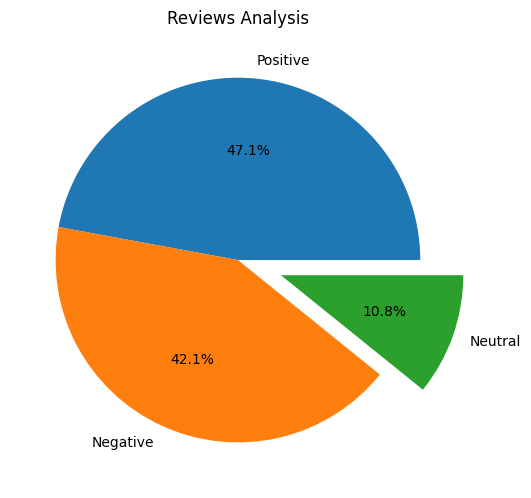

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,15))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [ ]:
df.to_csv("BA_reviews.csv")

# **Wordcloud**
Word Cloud or Tag Clouds is a visualization technique for texts that are natively used for visualizing the tags or keywords from the websites

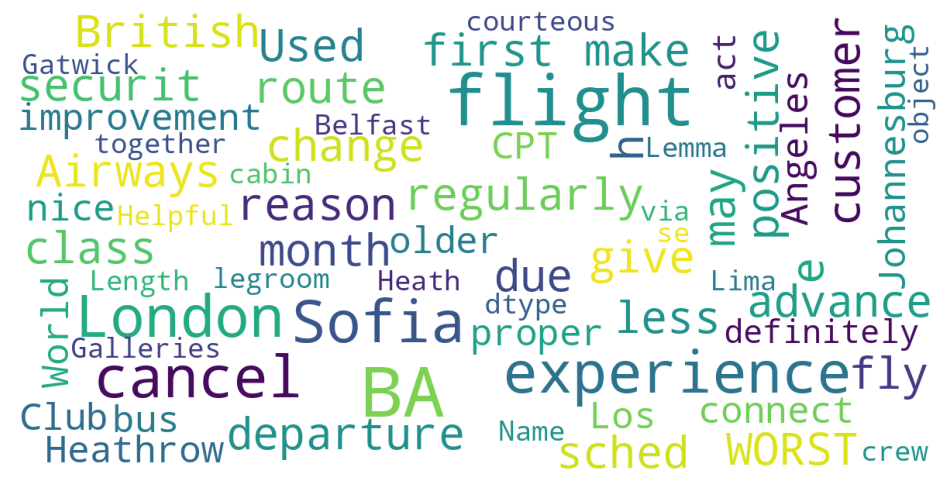

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)
